In [149]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-05-06 07:23:41--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   118MB/s    in 0.2s    

2023-05-06 07:23:42 (118 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [31]:
df_books.head(20)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
5,0399135782,The Kitchen God's Wife,Amy Tan
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley
7,0671870432,PLEADING GUILTY,Scott Turow
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie


In [5]:
df_books.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [17]:
df_ratings.head(20)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
5,276733,2080674722,0.0
6,276736,3257224281,8.0
7,276737,0600570967,6.0
8,276744,038550120X,7.0
9,276745,342310538,10.0


In [18]:
df_ratings.describe()

,user,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

On voit que pour la commande en dessous, les valeurs sont tous compactées en un seul endroit. Hors on veut des valeurs qui soient plus lisibles, donc on peut utiliser la fonction log.

<Axes: xlabel='user', ylabel='rating'>

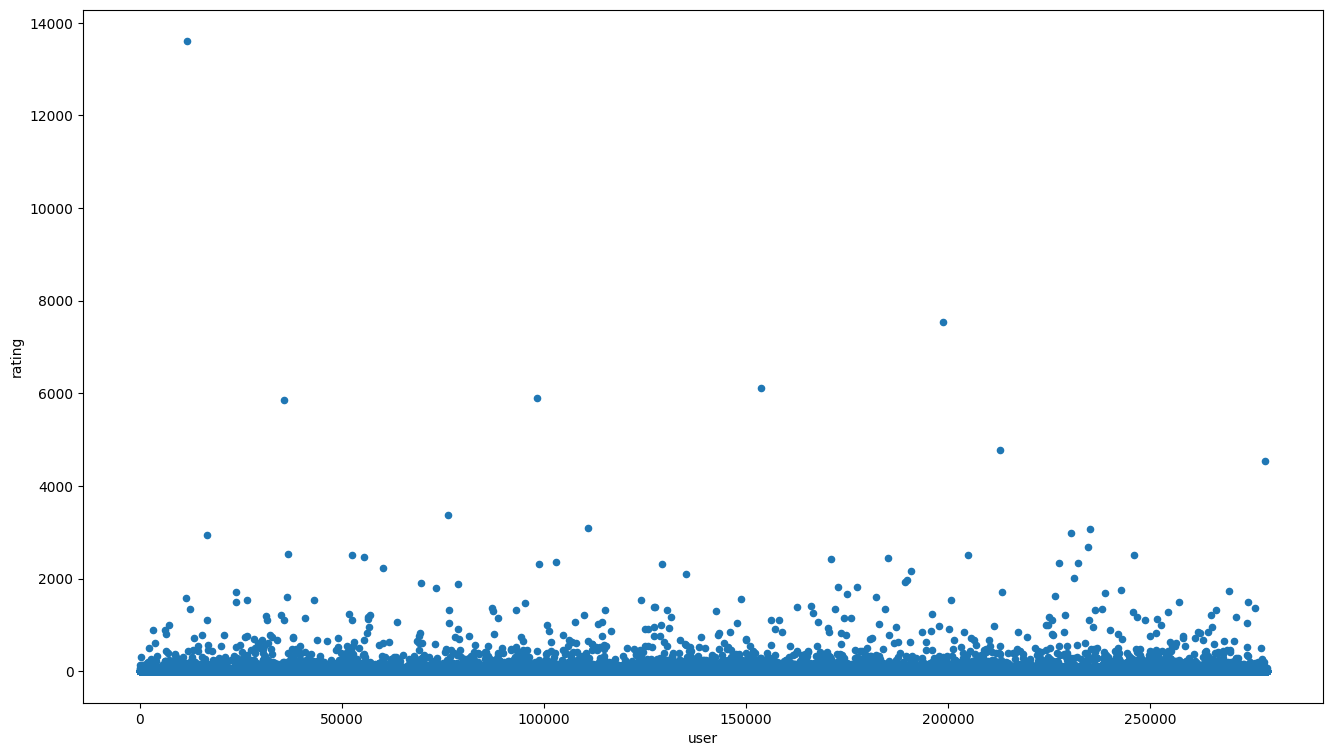

In [23]:
df = df_ratings[["user", "rating"]].groupby("user").count().reset_index()
df.plot.scatter(x="user", y="rating")

<Axes: xlabel='user', ylabel='rating_log'>

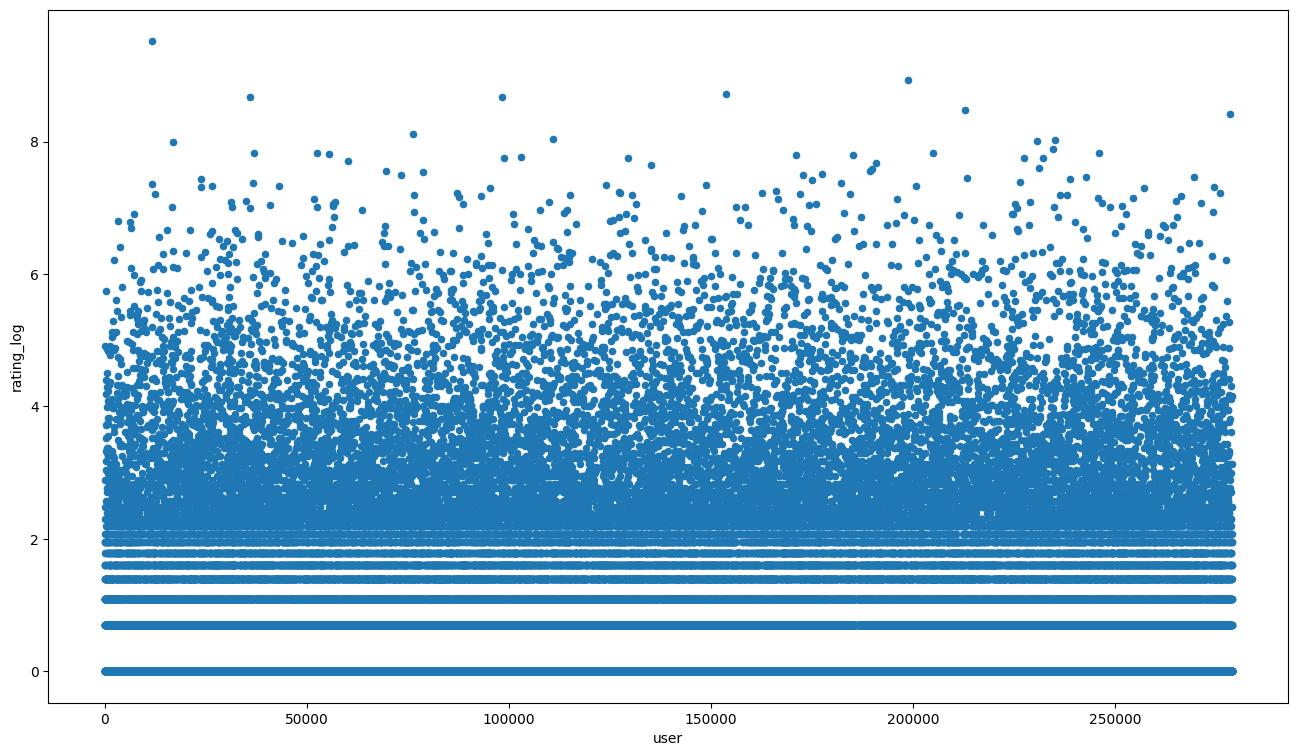

In [24]:
df = df_ratings[["user", "rating"]].groupby("user").count().reset_index()
df["rating_log"] = np.log(df["rating"])
df.plot.scatter(x="user", y="rating_log")

In [46]:
#Clean the data
df_clean_books = df_ratings.groupby("isbn").count().reset_index()
good_books = df_clean_books[df_clean_books["rating"]>=100]["isbn"]
good_books = df_books[df_books["isbn"].isin(good_books)]
good_books.head()

,isbn,title,author
18,0440234743,The Testament,John Grisham
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison
26,0971880107,Wild Animus,Rich Shapero
27,0345402871,Airframe,Michael Crichton
28,0345417623,Timeline,MICHAEL CRICHTON


In [278]:
dfu = df_ratings[["user", "rating"]]\
    .groupby(["user"])\
    .count()\
    .reset_index()

good_users = dfu.loc[dfu["rating"] >= 200]["user"]

df = df_ratings.loc[df_ratings["user"].isin(good_users)]
df = df.loc[df["isbn"].isin(good_books["isbn"])]
df.head()


,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [286]:
df_clean_users = df_ratings[["user","rating"]].groupby("user").count().reset_index()
good_users = df_clean_users[df_clean_users["rating"]>=200]["user"]
good_users = df_ratings[df_ratings["user"].isin(good_users)]
df_clean = good_users[good_users["isbn"].isin(good_books["isbn"])]
df_clean.head()


,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [287]:
df_b_features = df.pivot(index = "isbn", columns = "user", values = "rating").fillna(0)
df_b_features.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
matrice_b_features = csr_matrix(df_b_features)

In [348]:
#.get_loc(a) => get the row of a in a df
#
# function to return recommended books - this will be tested
def get_recommends(title = ""):
  recommended_books = []
  try:
    bk = good_books[good_books["title"] == title]
    isbn_bk = good_books[good_books["title"]==title]["isbn"].values[0]
  except:
    return 
  model = NearestNeighbors(metric = "cosine").fit(matrice_b_features)# cosine metrics commonly used for recommendations systems, including book recommendations systems
  book_loc = df_b_features.index.get_loc(isbn_bk)# get the number of rows where the isbn = isbn_bk in the df_b_features

  distances,indices = model.kneighbors(matrice_b_features[book_loc], n_neighbors = 6)
  recommended_books.append(title)
  recommended_books.append(list())
  for i in range(1,6):
    isbn_key = df_b_features.index[indices[0][i]]
    book_recommend = good_books[good_books["isbn"] == isbn_key]
    recommended_books[1].append([book_recommend["title"].values[0],distances[0][i]])
    recommended_books[1] = recommended_books[1][::-1]
  return recommended_books

In [349]:
print(get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))"))


["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Surgeon', 0.7699411], ['The Lovely Bones: A Novel', 0.7234864], ['I Know This Much Is True', 0.7677075], ['The Weight of Water', 0.77085835]]]


In [296]:
a = good_books[good_books["title"]=="The Perks of Being a Wallflower"]["isbn"].values[0]
print(a)
print(df_ratings[df_ratings["isbn"]== a]["rating"].count())

0671027344
103


In [350]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    print("Ok")
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Surgeon', 0.7699411], ['The Lovely Bones: A Novel', 0.7234864], ['I Know This Much Is True', 0.7677075], ['The Weight of Water', 0.77085835]]]
You passed the challenge! 🎉🎉🎉🎉🎉
